In [1]:
#import statements
import copy
import json
import os
import pandas
import subprocess
from subprocess import check_output
import time
import numpy

/tmp/ipykernel_75186/3860582105.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


In [2]:
#Q1
type(7/2)

float

In [3]:
#Q2
x = 4
maximum = 10
minimum = 5
error = (((x < 5) | (x > 10))) # True if x is outside the minimum-to-maximum range
error


True

In [4]:
#Q3
word = "KAFKAESQUE"
suffix_match = (word[-5:] == "ESQUE") # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match


True

In [5]:
#Q4
def check_sum(n=0,m=0,x=0):
    if (n + m) == x:
        return True
    else:
        return False

check_sum(n=0.1,m=0.2,x=0.3)

False

In [6]:
#Q5
check_sum(-1, 1)

True

In [7]:
#Q6
x = 4
if x % 2 == 1:
    status = "odd"
elif x % 2 == 0:
    status = "even"
else:
    status = "non-integer"
status

'even'

In [8]:
#Q7
nums = [3, 4, 1, 6]
#for x in nums:
#    print(x)
def smart_sum(nums):
    total = 0
    for i in nums:
        if i < 0:
            continue
        else:
            total += i
            if total > 20:
                break
    return total
smart_sum(nums)

14

In [9]:
#Q8
smart_sum([2, 1, -11, 3, 15, -1, 8, 2])

21

In [10]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2, "z" : 4}
coord3 = {"x": 3, "y": 1, "z" : 7}

rows = [
    [1, 6, 7, 8, coord1],
    [3, 4, 9, coord2],
    [5, 2, coord3],
]

In [11]:
#Q9
coord3["w"] = 6
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 4, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [12]:
#Q10
rows[0][-1]["x"]

8

In [13]:
#Q11
v2 = copy.copy(rows)
v2[0] = 404    # first change
v2[1][1] = 404 # second change
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [14]:
#Q12
b_index = header.index("B")
total = sum(row[b_index] for row in rows)
total

412

In [15]:
#Q13 
def get_column_a(row):
    return row[header.index("B")]

rows.sort(key=get_column_a, reverse = False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}],
 [1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}]]

In [16]:
#Q14
f = open("usd.json")
data = f.read()
f.close()

#print(type(data))
#print(data[:300] + "...")

x = json.loads(data)
y = x['cad']['rate']
z = round(1000 * y,2)
z



1345.67

In [17]:
#Q15
def divide(x,y):
    msg = float('nan')
    try:
        result = x/y
        return result
    except ZeroDivisionError:
        return msg

divide(6,4)

1.5

In [18]:
#Q16
divide(0,0)

nan

In [19]:
#Q17
directory = ('/home/akshaygona/machine-projects-labs/mp1/home-computers')
years = {}

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        year = int(filename.split('.')[0][-4:])
        df = pandas.read_csv(os.path.join(directory, filename), skiprows=1)
        df.set_index("Geographic Area Name", inplace=True)
        years[year] = df
sorted_keys = sorted(years.keys())
sorted_keys

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [20]:
#Q18
years[2021].at["Wisconsin", "Estimate!!Total"]

2401818

In [21]:
#Q19
years[2021]["Estimate!!Total!!No Computer"].sum()

8902093

In [22]:
#Q20
((years[2021]["Margin of Error!!Total!!No Computer"])/(years[2021]["Estimate!!Total!!No Computer"])).max()

0.07836701790752577

In [23]:
#Q21
states = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
noComputer = {}
for x in states:
    noComputer[x] = ((years[2021].at[x, "Estimate!!Total!!No Computer"])/(years[2021].at[x, "Estimate!!Total"]))*100
noComputer

{'Illinois': 7.351100500886871,
 'Indiana': 8.300995843439395,
 'Iowa': 8.302263591069158,
 'Michigan': 7.579772219831928,
 'Minnesota': 6.1777398950248985,
 'Wisconsin': 8.029750797104526}

<Axes: xlabel='Geographic Area Name', ylabel='% of Households w/o Computers'>

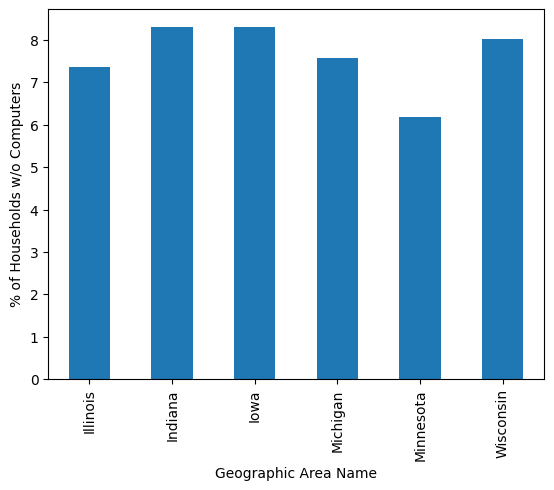

In [24]:
#Q22
(((years[2021]["Estimate!!Total!!No Computer"])/(years[2021]["Estimate!!Total"]))*100).loc[states].plot.bar(ylabel="% of Households w/o Computers")

<Axes: xlabel='Year', ylabel='WI Households without Computers (thousands)'>

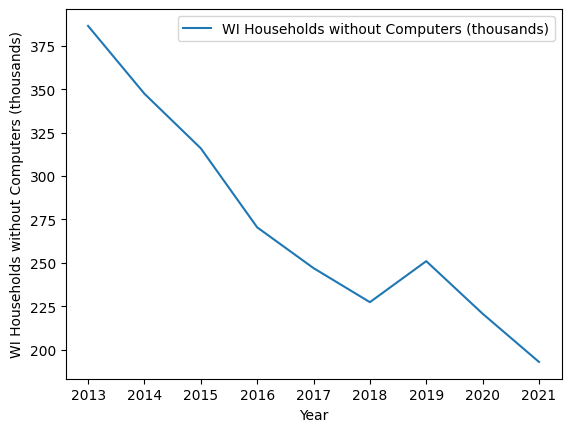

In [25]:
#Q23
data = []
for x in sorted(list(years.keys())):
    data.append([x, years[x].at["Wisconsin", "Estimate!!Total!!No Computer"]/1000])
df = pandas.DataFrame(data, columns = ["Year", "WI Households without Computers (thousands)"]).set_index("Year")
df.plot.line(ylabel="WI Households without Computers (thousands)")

<Axes: xlabel='Smartphones (millions)', ylabel='Tablets (millions)'>

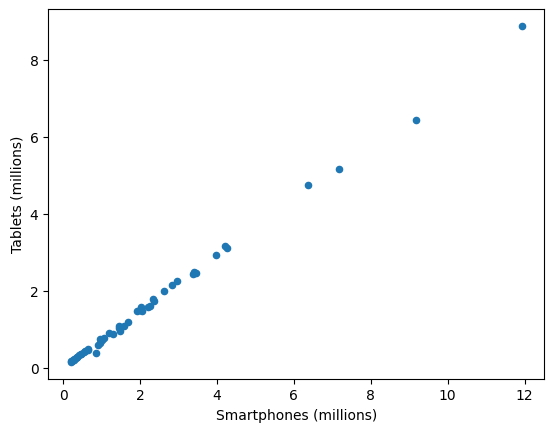

In [26]:
#Q24
df = pandas.concat([(years[2021]["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"]/1e6),(years[2021]["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"]/1e6)], axis = 1)
df.plot.scatter(x="Estimate!!Total!!Has one or more types of computing devices!!Smartphone", y = "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer", xlabel = "Smartphones (millions)", ylabel = "Tablets (millions)")

In [27]:
#Q25
check_output("git checkout main", cwd="flask", shell = True)
output = str(check_output("git log", cwd="flask", shell = True),"utf-8")
log = output.split('\n')
log[0]

Previous HEAD position was f8789197 With -> with in headline
Switched to branch 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [28]:
#Q26
pwd_output = subprocess.check_output(["git", "log", "--format=%H"], cwd="flask").decode("utf-8")
commits = pwd_output.strip().split('\n')
last_10_commits = commits[-10:]
last_10_commits


['a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b74dbb9d571e927b69b24c30ec0624975',
 '625eba4bb403296a8bbc1e72cc9cf4a5126f6c02',
 '4aa76212d1be9b17a57249549c2a73fb10b6cda8',
 '3b36bef2e6165bb4dad73d17f23ee1879e99f497',
 '44b42e0fbd93d86e0f4e929bda8e5fb63e81035d',
 '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4',
 'b15ad394279fc3b7f998fa56857f334a7c0156f6',
 '33850c0ebd23ae615e6823993d441f46d80b1ff0']

In [29]:
#Q27

pwd_output = check_output(["git", "checkout",commits[-100]], cwd = "flask")
f = open("flask/README", "r")
readMe = f.read()
f.close()
readMe

Note: switching to 'f878919753a909e45b2d5448aa175f4f9129ff24'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at f8789197 With -> with in headline


"\n                          // Flask //\n\n         because sometimes a pocket knife is not enough\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n    ~ Is it ready?\n\n      A preview release is out now, and I'm hoping for some\n      input about what you want from a microframework and\n      how it should look like.  Consider the API to slightly\n      improve over time.\n\n    ~ What do I need?\n\n      Jinja 2.4 and Werkzeug 0.6.1.  `easy_install` will\n      install them for you if you do `easy_install Flask==dev`.\n      I encourage you to use a virtualenv.  Check the docs for\n      complete installation and usage instructions.\n\n    ~ Where are the docs?\n\n      Go to http://flask.pocoo.org/ for a prebuild version of\n      the current documentation.  Otherwise build them yourself\n      from the sphinx sources i

In [30]:
#Q28
pull = {}
for x in log:
    if ("Merge pull request" in x) and ("/" in x):
        user = x[(x.index("from")+5):x.index("/")]
        if user in pull:
            pull[user] += 1
        else:
            pull[user] = 1 
            
z = {k: v for k, v in pull.items() if v >= 10}
z

{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'davidism': 45,
 'untitaker': 20,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [31]:
#Q29
output = ""
try:
    msg = check_output(["pip3", "instal"], stderr=subprocess.STDOUT)
except subprocess.CalledProcessError as e:
    msg = e.output
    output = str(msg, "utf-8")
output

'ERROR: unknown command "instal" - maybe you meant "install"\n'

<Axes: xlabel='Rows', ylabel='Milliseconds'>

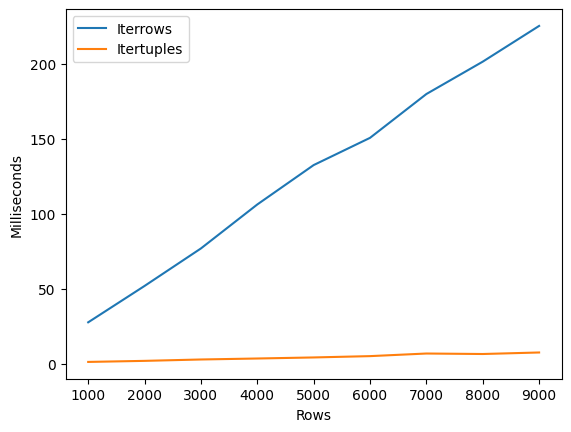

In [32]:
#Q30

def rand_df(rows):
    return pandas.DataFrame(numpy.random.randint(10, size=(rows, 5)),
                        columns=["A", "B", "C", "D", "E"],
                        index=[f"r{i}" for i in range(1, rows+1)])

def getIterrowsTime(df):
    t0 = time.time()
    for row in df.iterrows():
        pass
    t1 = time.time()
    return (t1-t0)*1e3

def getItertuplesTime(df):
    t0 = time.time()
    for row in df.itertuples():
        pass
    t1 = time.time()
    return (t1-t0)*1e3


times_df = pandas.DataFrame(dtype=float)

for x in range(1,10):
    randdf = rand_df(x*1000)
    times_df.at[x*1000, "Iterrows"] = getIterrowsTime(randdf)
    times_df.at[x*1000, "Itertuples"] = getItertuplesTime(randdf)
    
times_df.plot.line(xlabel = "Rows", ylabel = "Milliseconds")

<Axes: xlabel='Rows', ylabel='Milliseconds'>

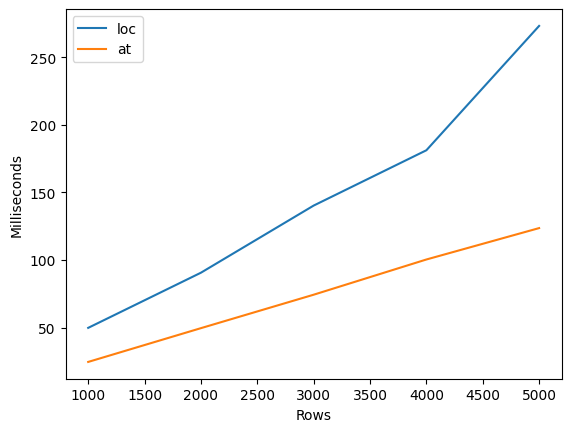

In [33]:
#Q31
def getAtTime(df):
    t0 = time.time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t1 = time.time()
    return (t1-t0)*1e3
    
def getLocTime(df):
    t0 = time.time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1 = time.time()
    return (t1-t0)*1e3

times_df = pandas.DataFrame(dtype=float)

for x in range(1,6):
    randdf = rand_df(x*1000)
    times_df.at[x*1000, "loc"] = getLocTime(randdf)
    times_df.at[x*1000, "at"] = getAtTime(randdf)
    
times_df.plot.line(xlabel = "Rows", ylabel = "Milliseconds")

<Axes: xlabel='Rows', ylabel='Milliseconds'>

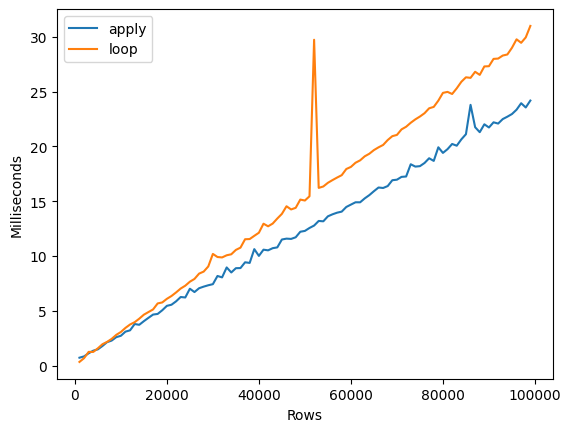

In [34]:
#Q32

def laugh(x):
    return "qwerty" * x

def getApplyTime(df):
    t0 = time.time()
    result = df["A"].apply(laugh).tolist()
    t1 = time.time()
    return (t1-t0)*1e3

def getLoopTime(df):
    t0 = time.time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1 = time.time()
    return (t1-t0)*1e3

times_df = pandas.DataFrame(dtype=float)

for x in range(1,100):
    randdf = rand_df(x*1000)
    times_df.at[x*1000, "apply"] = getApplyTime(randdf)
    times_df.at[x*1000, "loop"] = getLoopTime(randdf)
    
times_df.plot.line(xlabel = "Rows", ylabel = "Milliseconds")